# Machine Learning Assignment 3
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling and Testing

### 1. Defining the problem statement
with using titanic dataset what sorts of people were likely survive
we will apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

# 2. Collecting the data



In [56]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


 #### Cleaning the dataset by removing all null variable
- fillna with median
- fillna with mean

In [57]:
#cleaning train data
data["Age"].fillna(data.Age.mean(), inplace=True)
data["Fare"] = data["Fare"].fillna(data["Fare"].median())
data["Embarked"] = data["Embarked"].fillna('S')
data["Cabin"] = data["Cabin"].fillna(0)
#data.isnull().sum()
#cleaning test data
test["Age"].fillna(test.Age.mean(), inplace=True)
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
test["Embarked"] = test["Embarked"].fillna('S')
test["Cabin"] = test["Cabin"].fillna(0)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 3. Exploratory data analysis

###  Set of tables 
- Pclass
- Age
- Gender 


In [58]:
data.groupby('Sex').agg('mean')[['Survived']].reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


The table confirms that **Women** more likely survivied than **Men**

In [59]:
data.groupby('Pclass').agg('mean')[['Survived']].reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


So it clearly seems that,The survival of the people belong to 3rd class is very least.
It looks like ...
-  63% first class passenger survived titanic tragedy, while
-  48% second class and
-  only 24% third class passenger survived.
It is true since there were a lot more third class passengers than first and second.

In [60]:
#creating the age table 
bins= [0,10,20,30,40,50,60,70,80,90]
data['agebin']= pd.cut(data['Age'],bins)
data[data['Survived']==1]['agebin'].value_counts().sort_index()
#data.groupby('agebin').agg('mean')[['Survived']]
#data.groupby('agebin').agg('mean')[['Survived']].plot(kind='bar')

(0, 10]      38
(10, 20]     44
(20, 30]    136
(30, 40]     69
(40, 50]     33
(50, 60]     17
(60, 70]      4
(70, 80]      1
(80, 90]      0
Name: agebin, dtype: int64

This shows that the high number people who survived their age range is between 20 to 30

In [61]:
def tables(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    print(df)

In [62]:
tables('Sex')

          female  male
Survived     233   109
Dead          81   468


In [63]:
tables('Pclass')

            1   2    3
Survived  136  87  119
Dead       80  97  372


In [64]:
tables('agebin')

          (0, 10]  (10, 20]  (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  \
Survived       38        44       136        69        33        17         4   
Dead           26        71       271        86        53        25        13   

          (70, 80]  (80, 90]  
Survived         1         0  
Dead             4         0  


In [65]:
tables('SibSp')

              0      1     2     3     4    5    8
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0


This table is pretty self explanatory with all the labels and colors. Something I have noticed that some might find questionable is that in, the plot; a person aboarded with more than 2 siblings or spouse more likely survived
,a person aboarded without siblings or spouse more likely dead

In [66]:
tables('Embarked')

            S   C   Q
Survived  219  93  30
Dead      427  75  47


The Chart confirms a person aboarded from C slightly more likely survived
The Chart confirms a person aboarded from Q more likely dead
The Chart confirms a person aboarded from S more likely dead

# Feature engineering
#### Encoding the categorical values into numerical values
- by using map function
#### Generating new features like:
- The length of the name -- this could pertain to how rich the person was, and therefore their position in the Titanic.
- The total number of people in a family (SibSp + Parch).
- This can improve our predictions about survival chance based on social position or family members aboard who helped.

##### Encoding name feature

In [67]:
#Extracting title from the name in train
name = pd.Series(data['Name'])
for dataset in data:
    dataset = name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
#Extracting title from the name in test
name = pd.Series(test['Name'])
for dataset in data:
    dataset = name.str.extract(' ([A-Za-z]+)\.', expand=False)

Mr : 0
Miss : 1
Mrs: 2
Others: 3

In [68]:
#converting categorical into numerical values in train
data['title']=pd.DataFrame(dataset)
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
data['title']=data['title'].map(title_mapping)

#converting categorical into numerical values in test
test['title']=pd.DataFrame(dataset)
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
test['title']=test['title'].map(title_mapping)


In [69]:
#data['title'].value_counts()

In [70]:
#visualize the title
tables('title')

          0.0  1.0  2.0  3.0
Survived  101   27   25   10
Dead      139   51   47   18


There is nothing out of the ordinary of about this plot,because it is the same as above graphs because it shows that the high number of male died

##### Encoding sex feature

In [71]:
data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1


##### Encoding embarked feature

In [72]:
data["Embarked"] = data["Embarked"].fillna('S')
data.loc[data["Embarked"] == "S", "Embarked"] = 0
data.loc[data["Embarked"] == "C", "Embarked"] = 1
data.loc[data["Embarked"] == "Q", "Embarked"] = 2

test["Embarked"] = test["Embarked"].fillna('S')
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2


##### Encoding  cabin feature

In [73]:
for dataset in data:
    data['Cabin'] = data['Cabin'].str[:1]
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
    
data.loc[data["Cabin"] == "A", "Cabin"] = 0
data.loc[data["Cabin"] == "B", "Cabin"] = 0.4
data.loc[data["Cabin"] == "C", "Cabin"] = 0.8
data.loc[data["Cabin"] == "D", "Cabin"] = 1.2
data.loc[data["Cabin"] == "E", "Cabin"] = 1.6
data.loc[data["Cabin"] == "F", "Cabin"] = 2
data.loc[data["Cabin"] == "G", "Cabin"] = 2.4
data.loc[data["Cabin"] == "T", "Cabin"] = 2.8

for dataset in test:
    test['Cabin'] = test['Cabin'].str[:1]
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
    
test.loc[test["Cabin"] == "A", "Cabin"] = 0
test.loc[test["Cabin"] == "B", "Cabin"] = 0.4
test.loc[test["Cabin"] == "C", "Cabin"] = 0.8
test.loc[test["Cabin"] == "D", "Cabin"] = 1.2
test.loc[test["Cabin"] == "E", "Cabin"] = 1.6
test.loc[test["Cabin"] == "F", "Cabin"] = 2
test.loc[test["Cabin"] == "G", "Cabin"] = 2.4
test.loc[test["Cabin"] == "T", "Cabin"] = 2.8
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",0,34.50000,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.00000,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.00000,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,1,3101298,12.2875,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.27259,0,0,A.5. 3236,8.0500,NaN,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,0,PC 17758,108.9000,0.8,1,3
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0
416,1308,3,"Ware, Mr. Frederick",0,30.27259,0,0,359309,8.0500,NaN,0,0


##### combining sibsp+parch features

In [74]:
data["FamilySize"] = data["SibSp"] + data["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

In [75]:
# rank the variable according to the correlation between itself and survival.
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467,-0.000245,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811,-0.062270,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702,0.114195,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569,-0.026003,0.200988
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461,0.017431,-0.248512
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961,0.047878,0.890712
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665,-0.027594,0.783111
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142,-0.085811,0.217138
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000,-0.028418,-0.080281
title,-0.000245,-0.062270,0.114195,-0.026003,0.017431,0.047878,-0.027594,-0.085811,-0.028418,1.000000,0.021487


##### droping feature (?)

In [76]:
features_drop = ['Ticket', 'SibSp', 'Parch',"Name",'agebin']
data = data.drop(features_drop, axis=1)
features_drop = ['Ticket', 'SibSp', 'Parch',"Name"]
test = test.drop(features_drop, axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
title          418 non-null int64
FamilySize     418 non-null int64
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [77]:
data.shape

(891, 10)

In [78]:
#makecol=make_column_transformer((OneHotEncoder(),['sex','cabin','embarked','boat','home.dest']),remainder='passthrough')

**Modeling the Data**

I will train the data with the following models:
- Logistic Regression
- Gaussian Naive Bayes
- Decision Tree Classifier
- Support Vector Machines
- K-Nearest Neighbors(KNN)
- RandomForest
- LinearSVC

- Note : - I used many model to see which one work great 
       - learning purpose   

In [79]:
train_data = data.drop('Survived', axis=1)
y = data['Survived']
train_data=pd.DataFrame(train_data).fillna(0)
y=pd.DataFrame(y).fillna(0)
X_test=pd.DataFrame(test).fillna(0)
X_test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,title,FamilySize
0,892,3,0,34.50000,7.8292,0.0,2,0,0
1,893,3,1,47.00000,7.0000,0.0,0,2,1
2,894,2,0,62.00000,9.6875,0.0,2,0,0
3,895,3,0,27.00000,8.6625,0.0,0,0,0
4,896,3,1,22.00000,12.2875,0.0,0,2,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,8.0500,0.0,0,0,0
414,1306,1,1,39.00000,108.9000,0.8,1,3,0
415,1307,3,0,38.50000,7.2500,0.0,0,0,0
416,1308,3,0,30.27259,8.0500,0.0,0,0,0


##### spliting the datasets into train and test

In [80]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(train_data)

## Modeling and Testing

In [81]:
X_tests=ss.fit_transform(X_test)

In [82]:
#X_train,X_test,y_train,y_test, = train_test_split(X_train,y,test_size=0.65,random_state=0)

##### KNN

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:

knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train,y)
y_pre=knn.predict(X_test)
metrics.accuracy_score(y,knn.predict(X_train))
score = cross_val_score(knn, X_train, y, scoring='accuracy')

In [85]:
round(np.mean(score)*100, 2)

80.02

In [86]:
metrics.accuracy_score(y,knn.predict(X_train))

0.8294051627384961

##### Decision Tree

In [87]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
score = cross_val_score(dt, X_train, y,scoring='accuracy')
dt.fit(X_train,y)
y_pre=dt.predict(X_test)
score

array([0.71717172, 0.57575758, 0.8047138 ])

In [88]:
round(np.mean(score)*100, 2)

69.92

In [89]:
metrics.accuracy_score(y,dt.predict(X_train))

1.0

##### Best model to be used is Random Forest 

In [90]:
#random = RandomForestClassifier(n_estimators=100)
#random.fit(train_data, y)
#score = cross_val_score(random, X_train, y, n_jobs=1, scoring='accuracy')
#y_pre=random.predict(X_test)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_data, y)

Y_prediction = random_forest.predict(X_test)

random_forest.score(train_data, y)


submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pre
    })

submission.to_csv('kaggle_finalsubmissions.csv', index=False)


In [91]:
acc_random_forest = round(random_forest.score(train_data, y) * 100, 2)
acc_random_forest

100.0

#### finding the probability of survival

In [92]:
my_survival=[[3,1,1,29,211,1,1,3,0]]
my_survival_scaled=ss.fit_transform(my_survival)
y_p=random_forest.predict(my_survival_scaled)
y_p
if y_p==0:
    print('died')
else:
    print('survived')

survived


In [93]:
my_data=[[3,1,1,29,211,1,1,3,0]]
res=random_forest.predict_proba(my_data)
res

array([[0.02, 0.98]])

In [94]:
#the prabability of me surving the titanic is 0.97
random_forest.predict_proba(my_data)[:,1]

array([0.98])

In [41]:
gaussian = GaussianNB()
gaussian.fit(X_train,y)
score = cross_val_score(gaussian, X_train, y, n_jobs=1, scoring='accuracy')
y_pre=gaussian.predict(X_test)
print(score)

[0.74074074 0.8047138  0.81481481]


In [42]:
round(np.mean(score)*100, 2)

78.68

In [43]:
metrics.accuracy_score(y,gaussian.predict(X_train))

0.7991021324354658

##### LinearSVC

In [44]:
#not good
from sklearn.svm import LinearSVC
linear = LinearSVC()
linear.fit(X_train,y)
score = cross_val_score(linear, X_train, y, n_jobs=1, scoring='accuracy')
print(score)
y_pre=linear.predict(X_test)

[0.8013468  0.80808081 0.7979798 ]


In [45]:
round(np.mean(score)*100, 2)

80.25

In [46]:
metrics.accuracy_score(y,linear.predict(X_train))

0.8103254769921436

##### SVM

In [47]:
clf = SVC()
clf.fit(X_train,y)
score = cross_val_score(clf, X_train, y, n_jobs=1, scoring='accuracy')
y_pre=clf.predict(X_test)

In [48]:
round(np.mean(score)*100, 2)

81.93

In [49]:
metrics.accuracy_score(y,clf.predict(X_train))

0.8428731762065096

In [50]:
model = LogisticRegression()
model.fit(X_train, y)
#y_pred=model.predict(X_test)
scoring = 'accuracy'
score = cross_val_score(model, X_train, y, n_jobs=1, scoring=scoring)
print(score)
y_pre=model.predict(X_test)

[0.81144781 0.8047138  0.8047138 ]


In [51]:
round(np.mean(score)*100, 2)

80.7

In [52]:
metrics.accuracy_score(y,model.predict(X_train))

0.813692480359147

#### Confusion matrix


In [53]:
mat= metrics.confusion_matrix(y,model.predict(X_train))
mat

array([[477,  72],
       [ 94, 248]], dtype=int64)

Text(30.5, 0.5, 'true value')

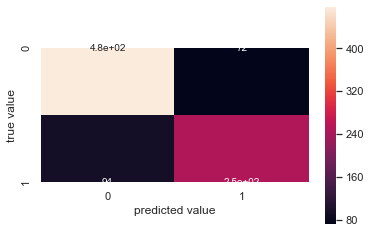

In [54]:
sns.heatmap(mat, square=True, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value')